## Notebook explaining how to come up with algorithms and write them in code

I received a few DMs about this and it is quite understandable that you're having a hard time making your first profitable algorithm. So I've laid out a very basic approach based around the one product we have currently (Product 1).


In [9]:
# libraries we'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ignore; visualization stuff
plt.style.use('ggplot')
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [10]:
prices = pd.read_csv('data/abra_price.csv')
prices.head()

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3
0,0,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN
1,1,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN
2,2,1966,1,1965.0,21.0,NaN,NaN,1969,22,NaN,NaN,NaN,NaN
3,3,1965,25,NaN,NaN,NaN,NaN,1968,25,NaN,NaN,NaN,NaN
4,4,1966,25,NaN,NaN,NaN,NaN,1968,6,1969.0,25.0,NaN,NaN


If you've read the notion page, some things here will look familiar to you.
What we see here is the OrderBook. There are 3 bids and 3 asks at most for this product and as far as we can tell, it seems to be around \$10000 price level but we should plot it just to be sure.

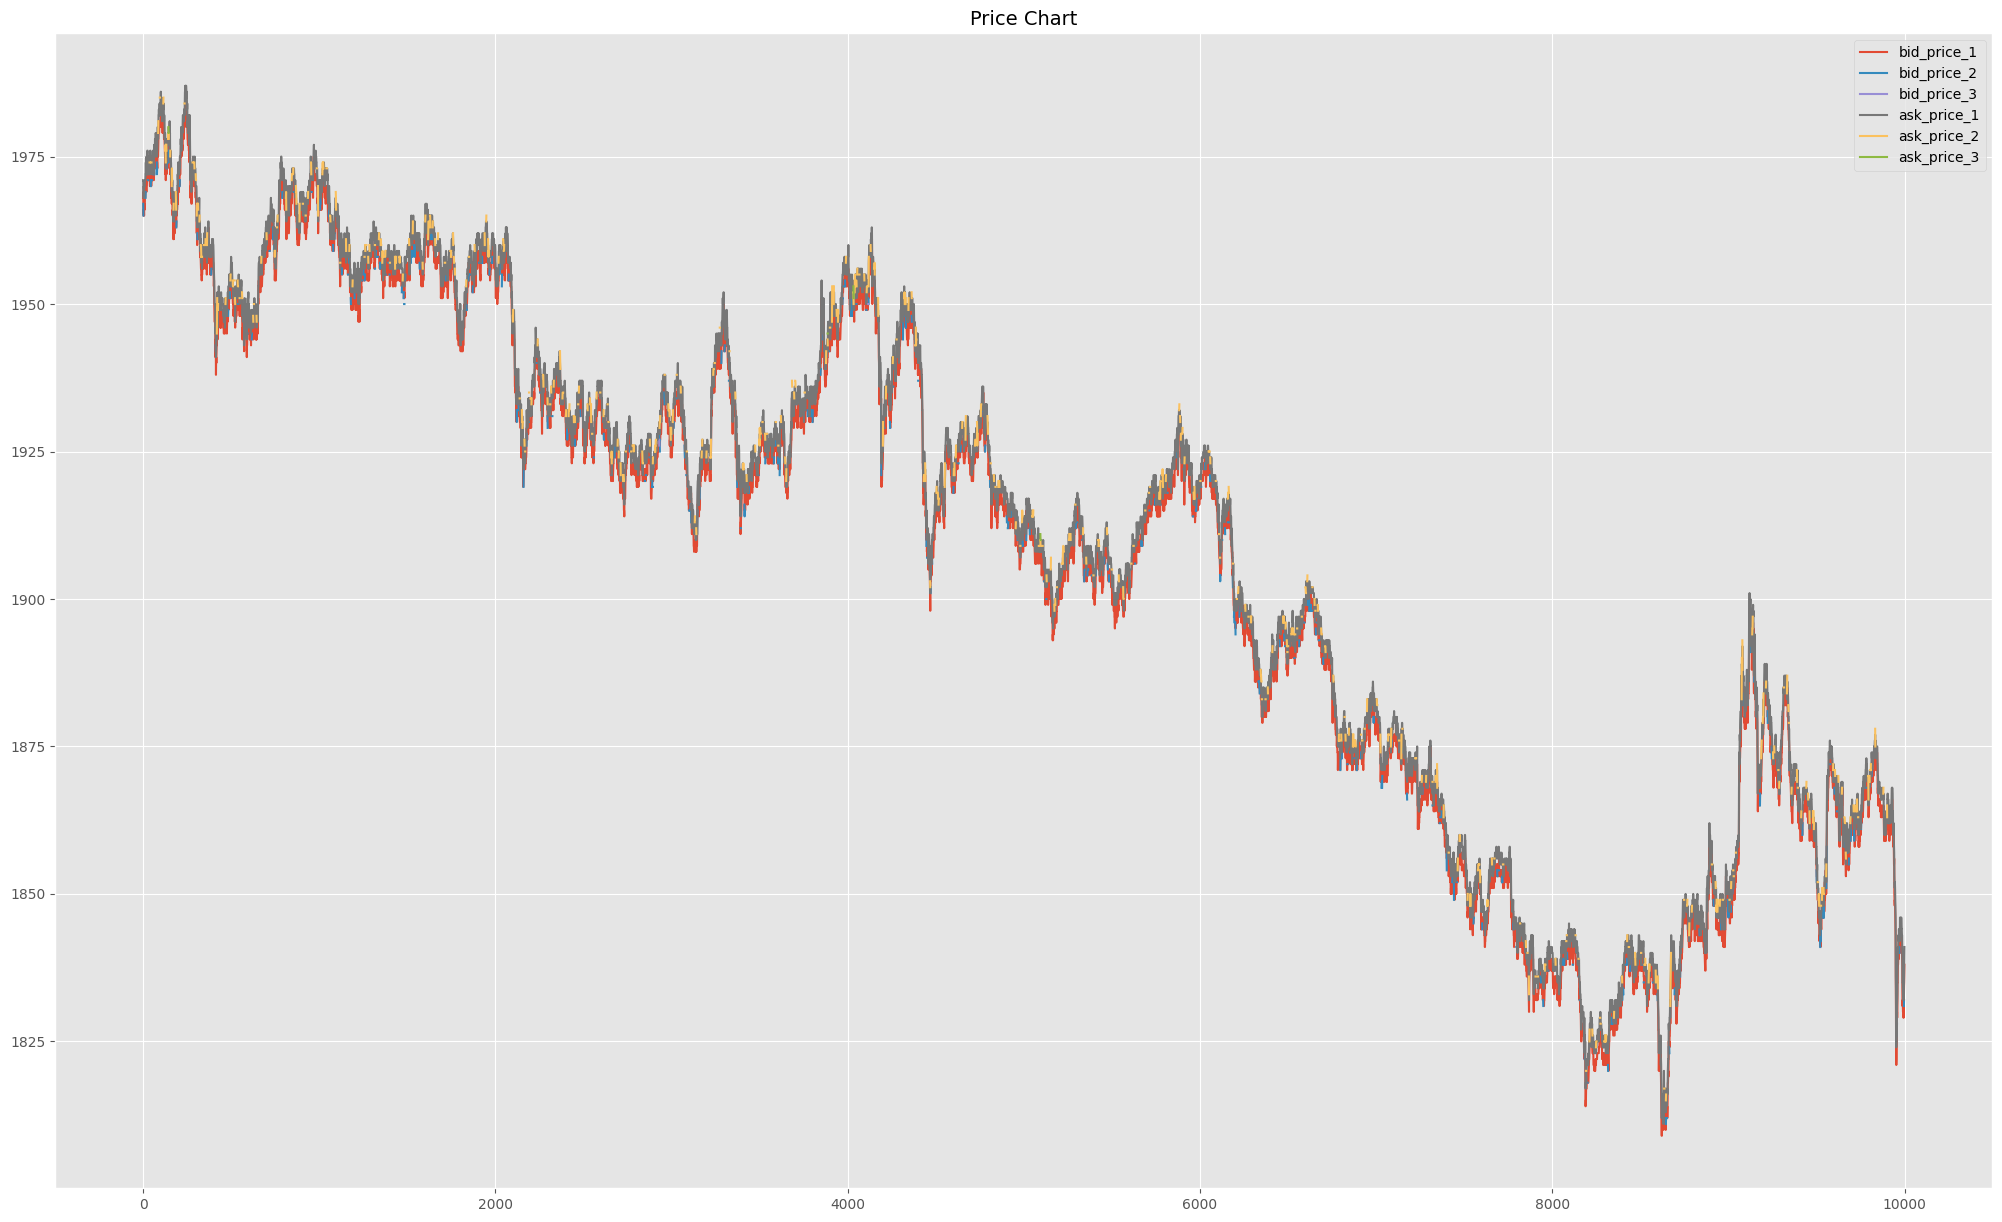

In [11]:
ts = prices['timestamp']
bp1 = prices['bid_price_1']
bp2 = prices['bid_price_2']
bp3 = prices['bid_price_3']
# bv1 = prices['bid_volume_1']
# bv2 = prices['bid_volume_2']
# bv3 = prices['bid_volume_3']
ap1 = prices['ask_price_1']
ap2 = prices['ask_price_2']
ap3 = prices['ask_price_3']
# av1 = prices['ask_volume_1']
# av2 = prices['ask_volume_2']
# av3 = prices['ask_volume_3']

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()

That's one ugly looking price chart. It's because we're plotting so many data points at once. But even from this we can tell a few things.

- The y-axis is in the range of [1e4 - 5, 1e4 + 5]. Which is crucial information. This means that the price of this product stays within a very narrow range of only 10 price levels.
- We can easily see that the mid-price is \$10k on average. This is also the fair value of this product.

Since we know that the price doesn't change much at all, we can slice into this data and get a better view of the price chart.

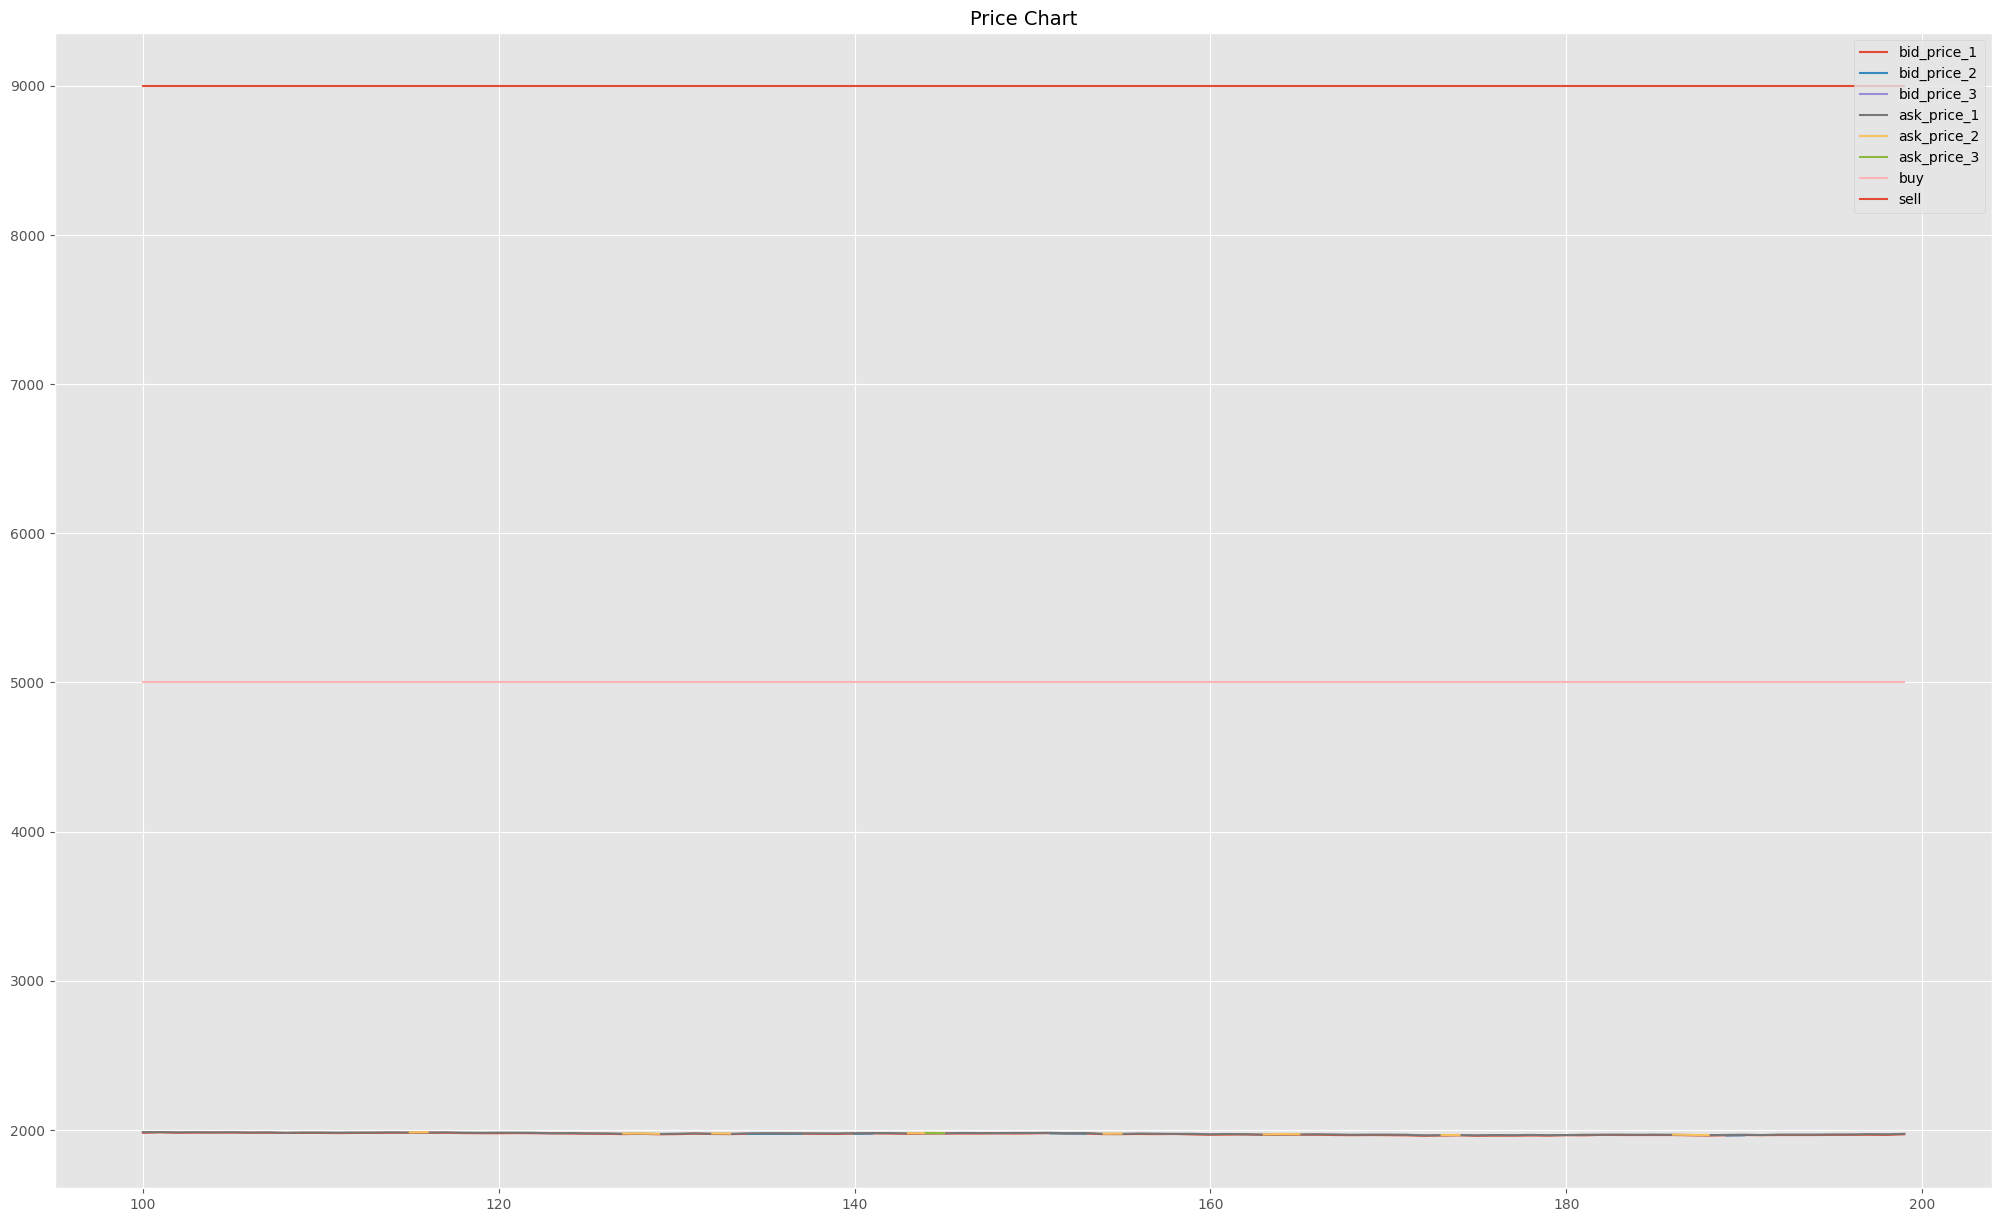

In [12]:
# slice
prices_sliced = prices[100:200]

# copy paste our previous cell and hit run
ts = prices_sliced['timestamp']
bp1 = prices_sliced['bid_price_1']
bp2 = prices_sliced['bid_price_2']
bp3 = prices_sliced['bid_price_3']
ap1 = prices_sliced['ask_price_1']
ap2 = prices_sliced['ask_price_2']
ap3 = prices_sliced['ask_price_3']

sell = np.full_like(ts, 9000)
buy = np.full_like(ts, 5000)

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
    'buy': buy,
    'sell': sell
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()

Have a good look at this chart. We can observe the following things:
- Some bots are willing to buy the stock for a price as high as \$10002 and there are also bots willing to sell their stock for as low as \$9998. They won't trade with each other now because this is happening at different timestamps. Remember that we are looking at an uncrossed orderbook. Any trade that could have happened already happened and is shown in `trades.csv`.
- So if we constantly make buy orders at \$9998 and sell orders at \$10002 we should make a reasonable profit.

### Writing the algorithm

```python
class Trader:
    def run(self, state, current_position):
        result = {}
        orders: List[Order] = []
        order_depth: OrderBook = state.order_depth

        orders.append(Order("PRODUCT", 9998, 10))
        orders.append(Order("PRODUCT", 10002, -10))
        
        result["PRODUCT"] = orders
        return result
```

- A very simple **market-making** strategy. We keep putting orders in the market and earn the spread. We read about this in week 1.

Now let's run this algorithm and see the profit.
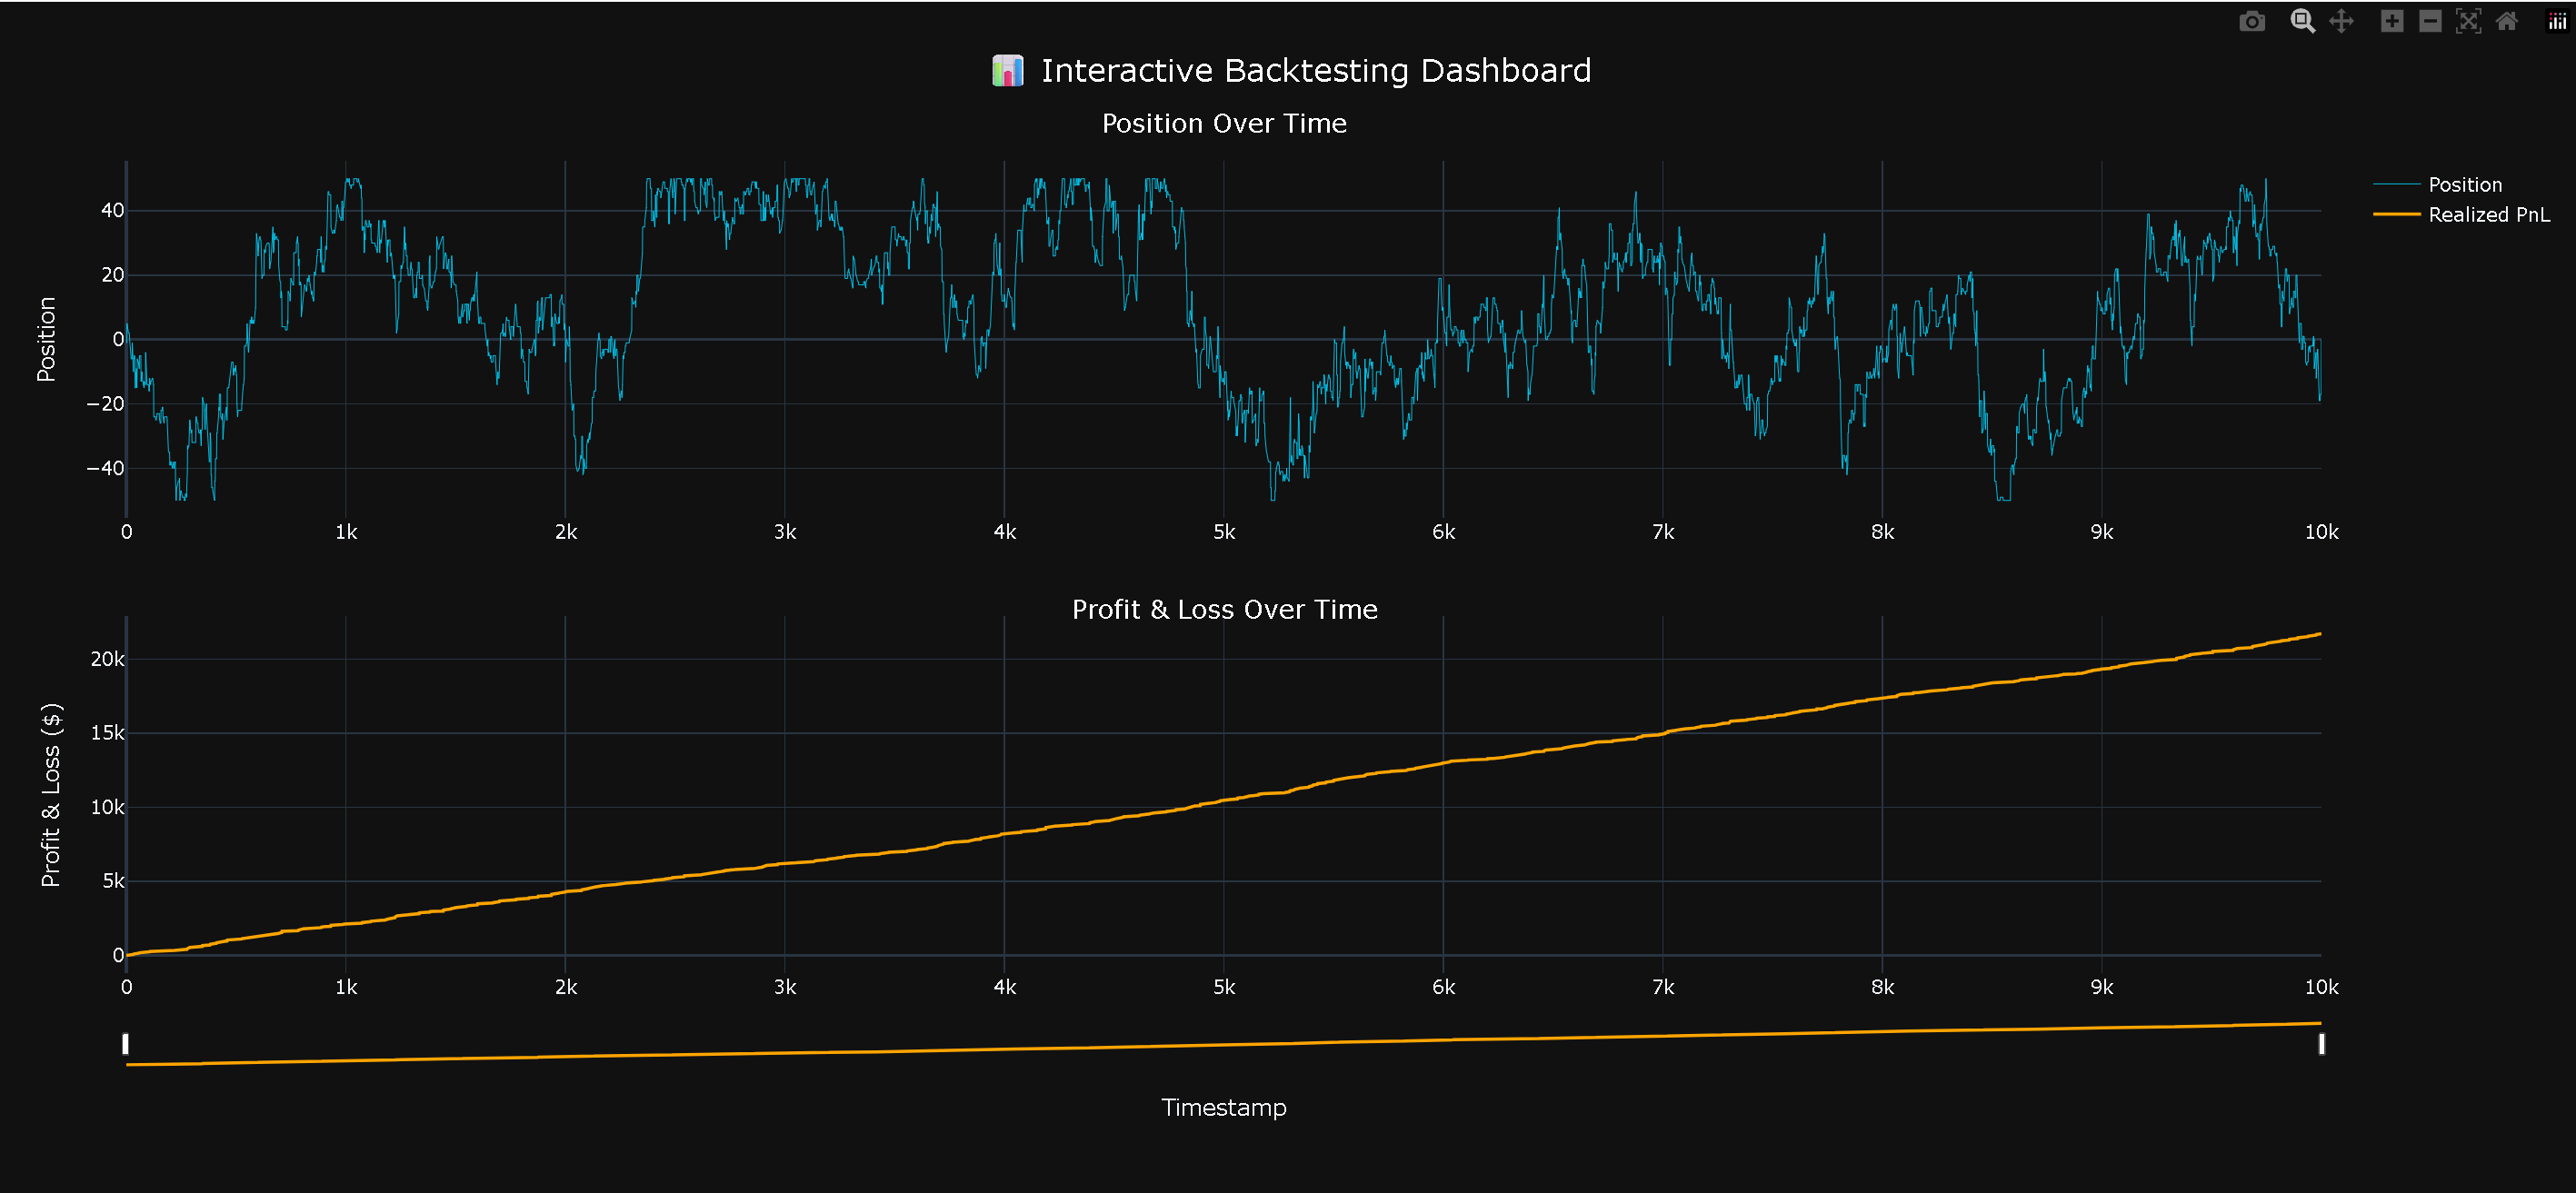

We got a profit of \$21k!
It looks like we made quite a few trades in the market. There isn't much left to improve here other than making sure we don't fill up our inventory quickly and miss out on some trades. Since this was a relatively stable stock, our strategy isn't that exciting or sophisticated. In our next two products you will have a chance to truly think deep about how to make the optimal algorithm. You may have to visualize zscores, bollinger bands, mid-prices, volatility and other such metrics on matplotlib and make decisions.

We have given you a general idea on how to start out making algorithms. Many times there won't be any one correct algorithm. It depends from product to product. The main thing is to get as many insights from the data you can and then convince yourself why a certain strategy might work and why it might not.